# Evaluating Logistic Regression Models - Lab

## Introduction

As we saw with KNN, we need alternative evaluation metrics to determine the effectiveness of classification algorithms. In regression, we were predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall and accuracy in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for precision, the number of cancer positive cases, then it is to optimize recall, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('./heart.csv')
df.head()
X = df.drop('target', axis=1)
y = df.target

In [15]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## 2. Create a standard logistic regression model

In [16]:
clf = LogisticRegression(verbose=1)

In [17]:
clf.fit(X_train, y_train)

[LibLinear]

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

## 3. Write a function to calculate the precision

In [6]:
def recall(y_hat, y):
    TP, TN, FP, FN = 0, 0, 0, 0
    for actual, pred in zip(y, y_hat):
        # calculate positives first
        if pred == 1:
            if actual == 1:
                TP += 1
            if actual == 0:
                FP += 0
        # calculate negatives
        if pred == 0:
            if actual == 0:
                TN += 1
            if actual == 1:
                FN += 1
    
    numerator = TP
    denominator = TP + FN
    return float(numerator)/denominator

## 4. Write a function to calculate the recall

In [69]:
def precison(y_hat, y):
    TP, TN, FP, FN = 0, 0, 0, 0
    for actual, pred in zip(y, y_hat):
        # calculate positives first
        if pred == 1:
            if actual == 1:
                TP += 1
            if actual == 0:
                FP += 0
        # calculate negatives
        if pred == 0:
            if actual == 0:
                TN += 1
            if actual == 1:
                FN += 1
    
    numerator = TP
    denominator = TP + FP
    return float(numerator)/denominator

## 5. Write a function to calculate the accuracy

In [70]:
def accuracy(y_hat, y):
    TP, TN, FP, FN = 0, 0, 0, 0
    for actual, pred in zip(y, y_hat):
        # calculate positives first
        if pred == 1:
            if actual == 1:
                TP += 1
            if actual == 0:
                FP += 0
        # calculate negatives
        if pred == 0:
            if actual == 0:
                TN += 1
            if actual == 1:
                FN += 1
    
    numerator = TP + TN
    denominator = TP + TN + FP + FN
    return float(numerator)/denominator

In [71]:
def f1_score(y_hat, y):
    r = recall(y_hat, y)
    p = precison(y_hat, y)
    
    numerator = r*p*2
    denominator = p + r
    return float(numerator)/denominator

## 6. Calculate the precision, recall and accuracy of your classifier

In [29]:
y_hat_train = clf.predict_proba(X_train)
y_hat_test = clf.predict_proba(X_test)

In [30]:
y_hat_test[:5]

array([[0.16240531, 0.83759469],
       [0.04638682, 0.95361318],
       [0.9767811 , 0.0232189 ],
       [0.96895777, 0.03104223],
       [0.41447407, 0.58552593]])

In [31]:
def y_hat_thresh(y_hat_probs, thresh=0.50):
    y_hats = []
    for y in y_hat_probs:
        if y[1] >= thresh:
            y_hats.append(1)
        else:
            y_hats.append(0)
    return np.array(y_hats)

In [60]:
y_hat_train = clf.predict_proba(X_train)
y_hat_test = clf.predict_proba(X_test)

In [61]:
y_hat_train = y_hat_thresh(y_hat_train, thresh=0.80)

Do this for both the train and the test set.

In [65]:
print(precison(y_hat_train, y_train))
print(recall(y_hat_train, y_train))
print(f1_score(y_hat_train, y_train))
print(accuracy(y_hat_train, y_train))


1.0
0.5409836065573771
0.7021276595744682
0.7488789237668162


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [67]:
cm = confusion_matrix(y_train, y_hat_train)
cm

array([[101,   4],
       [ 56,  66]])

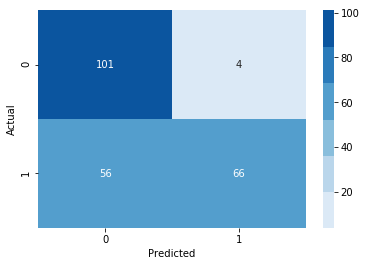

In [68]:
sns.heatmap(cm, cmap=sns.color_palette('Blues'), annot=True, fmt='0.16g')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [ ]:
importimport  matplotlib.pyplotmatplot  as plt
%matplotlib inline

In [ ]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= None) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = None
    y_hat_test = None
    y_hat_train = None

# 6 lines of code here

Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

In [ ]:
# code for test and train precision

In [ ]:
# code for test and train recall

In [ ]:
# code for test and train accuracy

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.